## Introduction

This project analyzes violent crime in Pittsburgh during October 2025 using the Monthly Criminal Activity Dataset. Violent crime was chosen as the focus because it directly affects personal safety and quality of life. In the dataset, violent crimes are identified using the NIBRS “Crime Against Person” category.

## The Metric

The metric used is the number of violent crimes per neighborhood in October 2025. This includes offenses such as assault, robbery, rape, and other direct crimes against a person. This metric was chosen because it reflects the most serious threats to safety.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.listdir()

%matplotlib inline

# Loads the dataset
df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

# Convert date column
df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

# Filters for October 2025
oct25 = df[(df["ReportedDate"].dt.year == 2025) & 
           (df["ReportedDate"].dt.month == 10)]

# Violent crimes = NIBRS Crime Against Person
violent = oct25[oct25["NIBRS_Crime_Against"] == "Person"]

# Count violent crimes per neighborhood
counts = violent.groupby("Neighborhood").size().sort_values()

# Shows the counts
counts

Neighborhood
Bon Air                       1
Central Oakland               1
Duquesne Heights              1
Point Breeze                  1
Morningside                   1
                             ..
Carrick                      20
Perry South                  22
Sheraden                     22
South Side Flats             30
Central Business District    40
Length: 72, dtype: int64

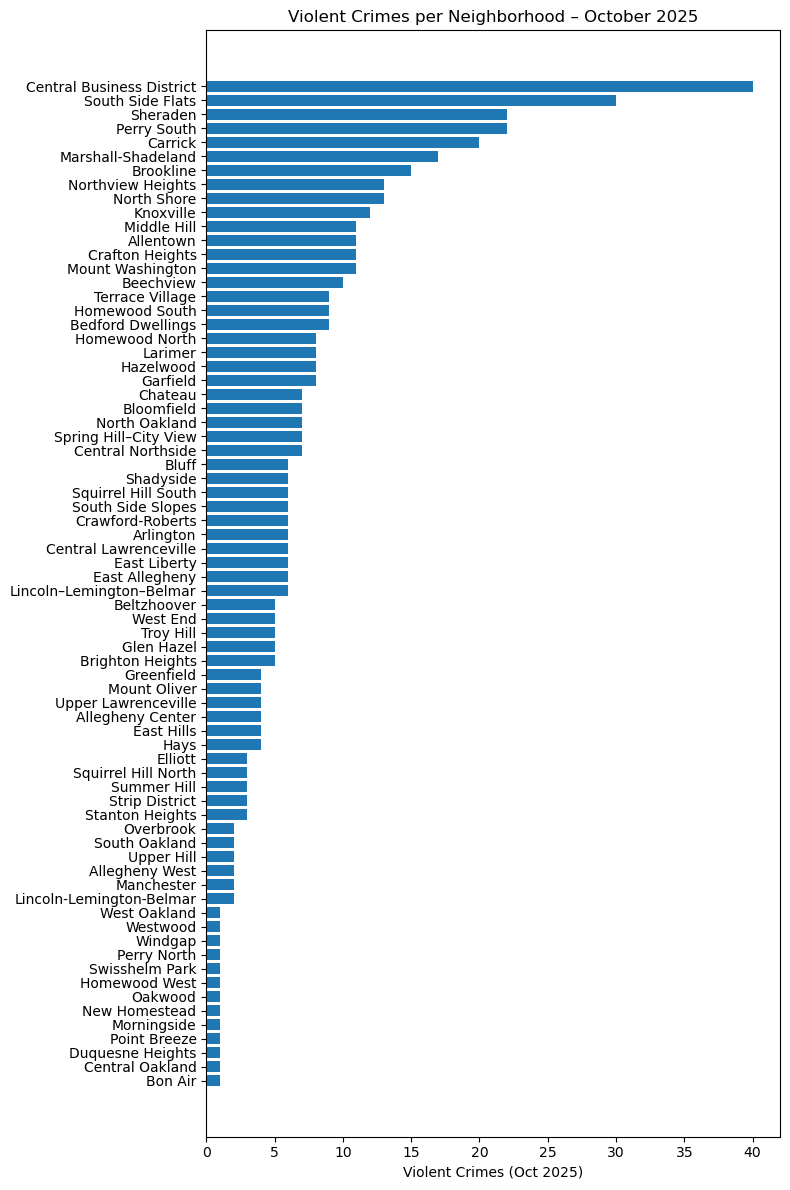

In [6]:
plt.figure(figsize=(8,12))
plt.barh(counts.index, counts.values)
plt.xlabel("Violent Crimes (Oct 2025)")
plt.title("Violent Crimes per Neighborhood – October 2025")
plt.tight_layout()

plt.show()

## The Best Neighborhood

After filtering the data, several neighborhoods tied as the safest, each reporting only one violent crime during the month. These include Bon Air, Windgap, Homewood West, Westwood, Morningside, New Homestead, and a few others. Meanwhile, areas like the Central Business District and South Side Flats had much higher counts. Based on this metric, Bon Air is tied for the safest neighborhoods in October 2025.

## Conclusion

Using violent crime as the measure of safety, multiple neighborhoods—including Bon Air—had extremely low levels of incidents. This provides an objective way to compare safety based on serious offenses, even if perceptions of safety may differ from person to person.

## Possible Limitations

Neighborhoods vary in population size, which can affect the number of reported crimes. A neighborhood with more people may naturally have more incidents, while a smaller neighborhood may appear safer simply because fewer people live there. Since this analysis uses raw counts, it does not measure crime rate per resident.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

october_2025 = df[
    (df["ReportedDate"].dt.year == 2025) &
    (df["ReportedDate"].dt.month == 10)
]

grouped = october_2025.groupby("Neighborhood")

counts = grouped.size()

counts = counts.sort_values()

counts

Neighborhood
Arlington Heights              1
Fairywood                      1
Ridgemont                      1
Regent Square                  2
East Carnegie                  3
                            ... 
Bloomfield                    76
Shadyside                     79
Carrick                      103
South Side Flats             164
Central Business District    390
Length: 88, dtype: int64

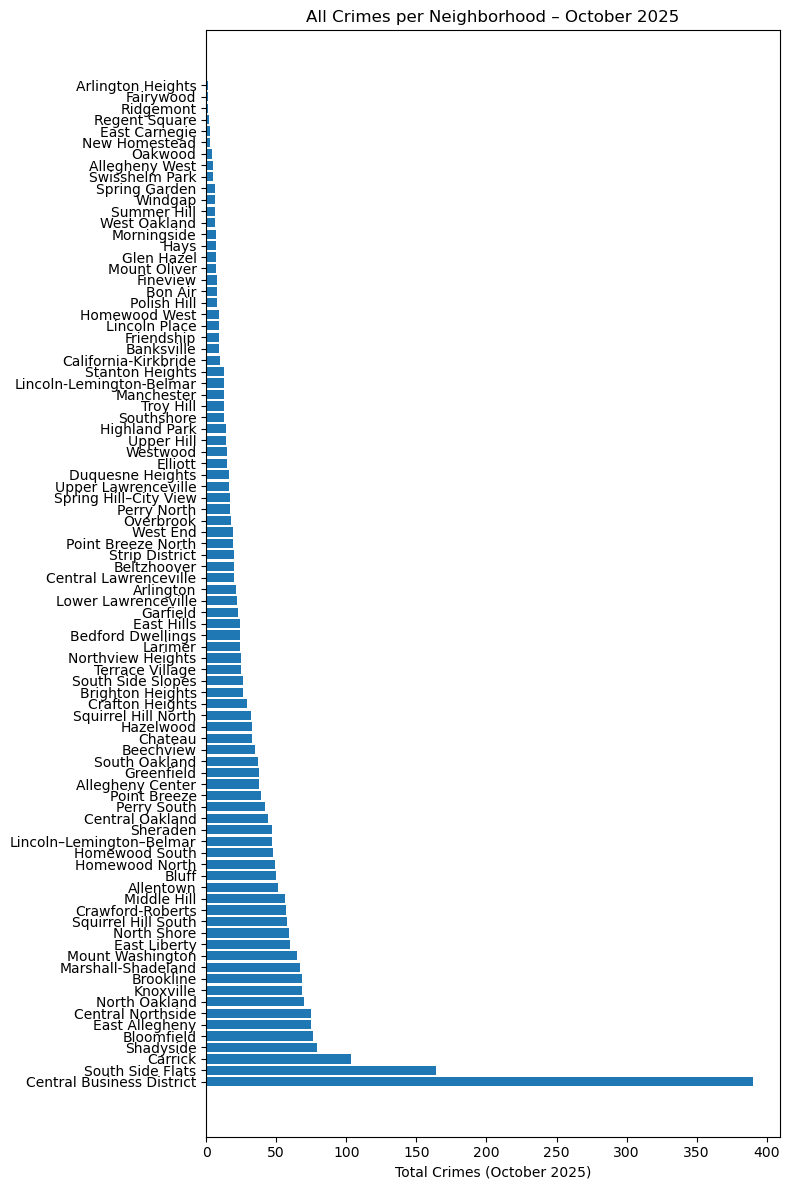

In [12]:
plt.figure(figsize=(8, 12))

plt.barh(counts.index, counts.values)

plt.xlabel("Total Crimes (October 2025)")
plt.title("All Crimes per Neighborhood – October 2025")

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

all_counts = df.groupby("Neighborhood").size().sort_values()

all_counts

Neighborhood
Saint Clair                    25
Ridgemont                      33
Chartiers                      38
New Homestead                  54
Swisshelm Park                 66
                             ... 
East Allegheny               1917
Shadyside                    1993
Carrick                      2242
South Side Flats             4631
Central Business District    7218
Length: 91, dtype: int64

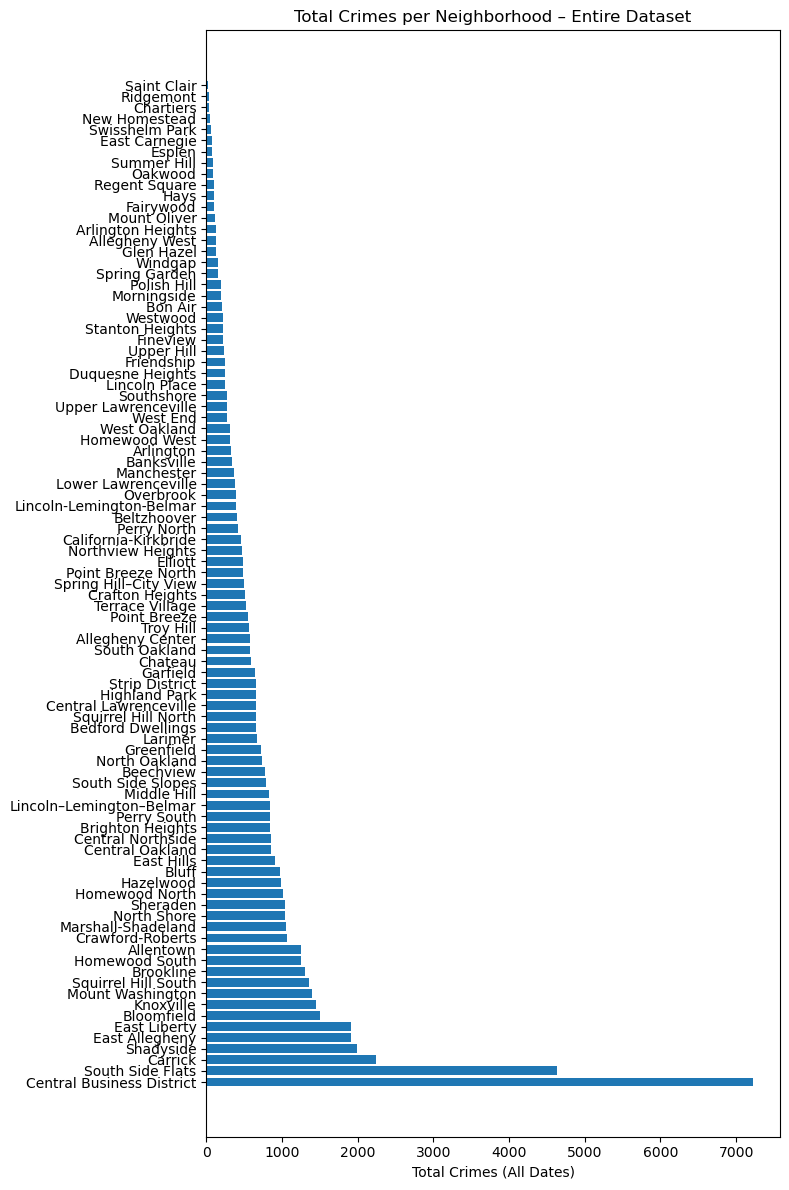

In [14]:
plt.figure(figsize=(8, 12))
plt.barh(all_counts.index, all_counts.values)
plt.xlabel("Total Crimes (All Dates)")
plt.title("Total Crimes per Neighborhood – Entire Dataset")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

violent_all = df[df["NIBRS_Crime_Against"] == "Person"]

violent_counts_all = violent_all.groupby("Neighborhood").size().sort_values()

violent_counts_all

Neighborhood
Ridgemont                      3
Regent Square                  5
Swisshelm Park                 7
Saint Clair                    7
Chartiers                      9
                            ... 
East Liberty                 291
Knoxville                    319
Carrick                      476
South Side Flats             534
Central Business District    981
Length: 91, dtype: int64

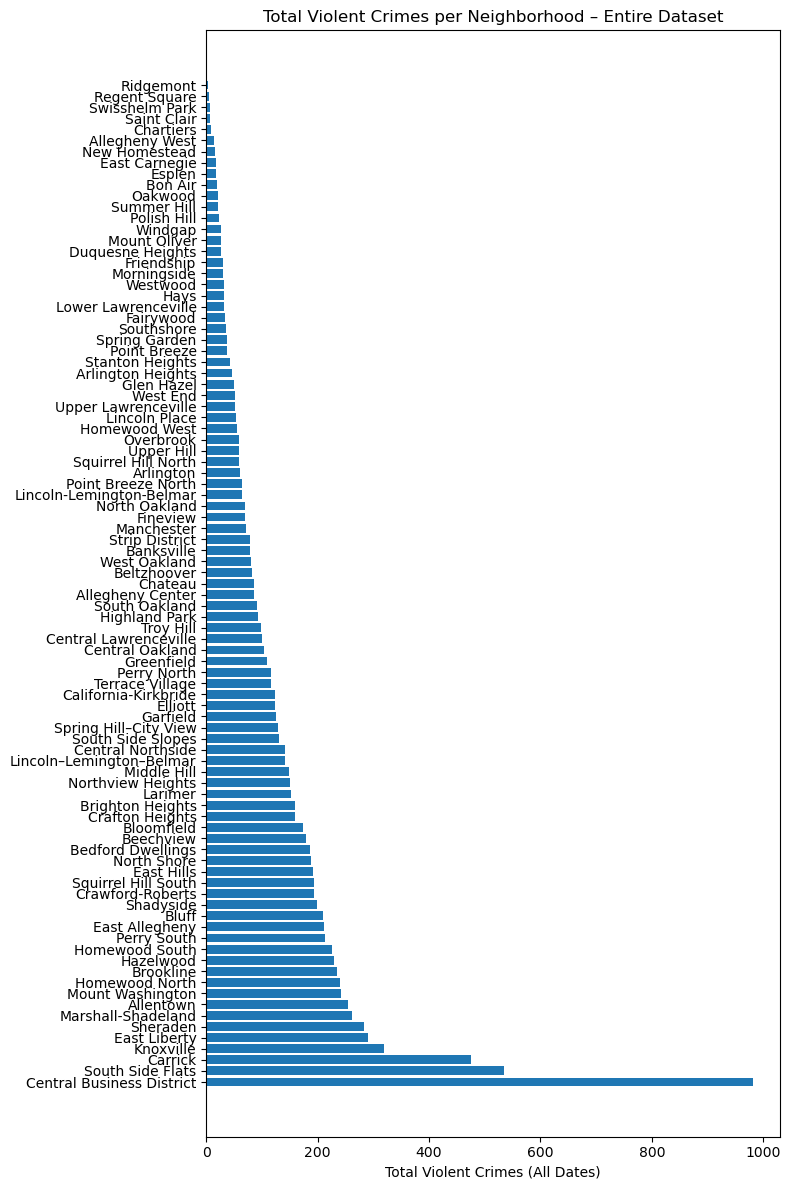

In [16]:
plt.figure(figsize=(8, 12))
plt.barh(violent_counts_all.index, violent_counts_all.values)
plt.xlabel("Total Violent Crimes (All Dates)")
plt.title("Total Violent Crimes per Neighborhood – Entire Dataset")
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()